# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import torch
from torch import nn, optim # nn contains all the PyTorch's building blocks for neural networks

print(torch.__version__)

2.4.1+cu121


# Data (preparing and loading) - using Linear Regression

#### Machine learning is a game of 2 parts 
1. Get the data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

In [3]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10], len(X), len(y), X.shape, y.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50,
 torch.Size([50, 1]),
 torch.Size([50, 1]))

# Creating training and test sets

In [4]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

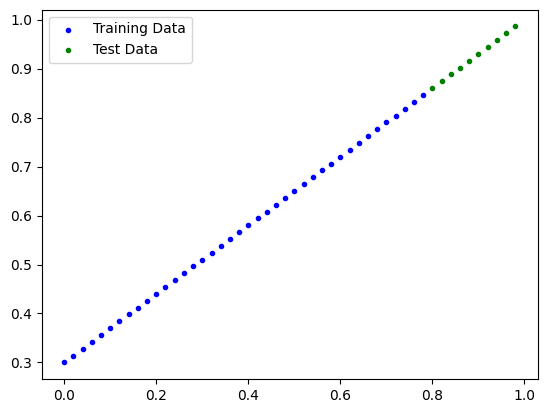

In [5]:
plt.scatter(X_train, y_train, c='b', label='Training Data', marker='.')
plt.scatter(X_test, y_test, c='g', label='Test Data', marker='.')
plt.legend(loc='best');

# Building a model

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))

    def forward(self, x:torch.Tensor):
        return self.weights*x + self.bias

In [7]:
# Creating a random seed
torch.manual_seed(42)

# Instance of the model
model_0 = LinearRegressionModel()

# Params
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
# Predictions on data with random weights and biases
with torch.inference_mode():
    y_preds = model_0(X_test)
# or 
with torch.no_grad():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

# Loss Function and Optimizer

In [10]:
loss_fn = nn.L1Loss() # MAE

optimizer = optim.SGD(model_0.parameters(), lr=0.01)
print(optimizer.param_groups)

[{'params': [Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)], 'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None}]


# Building a training and testing loop

1. Loop through the data
2. Forward pass
3. Loss calculations
4. Optimizer zero grad
5. Backpropagation
6. Optimizer step (Gradient Descent)

In [11]:
epochs = 100

# Tracking different values
epoch_count = []
training_loss = []
testing_loss = []

# Loop through the data
for epoch in range(epochs):
    # Setting the model to training mode
    model_0.train()  # Train mode sets all parameters that require gradients to require gradients
    # 1. Forward Pass
    y_pred = model_0(X_train)
    # 2. Calculate the loss
    train_loss = loss_fn(y_pred, y_train)
    if epoch%5==0:
        print(f'Train {epoch+1}====>{train_loss}')
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Loss backward - Backpropagation
    train_loss.backward()
    # 5. Step the optimizer
    optimizer.step()

    # Evaluation
    model_0.eval()   # Turns off gradient tracking 
    with torch.inference_mode():
        y_preds = model_0(X_test)
        test_loss = loss_fn(y_test, y_preds)
    if epoch%5==0:
        print(f'Test {epoch+1}====>{test_loss}')
        epoch_count.append(epoch)
        training_loss.append(train_loss)
        testing_loss.append(test_loss)

Train 1====>0.31288138031959534
Test 1====>0.48106518387794495
Train 6====>0.2552763521671295
Test 6====>0.41371020674705505
Train 11====>0.1976713240146637
Test 11====>0.3463551998138428
Train 16====>0.14006635546684265
Test 16====>0.27900025248527527
Train 21====>0.08908725529909134
Test 21====>0.21729660034179688
Train 26====>0.06395438313484192
Test 26====>0.17353470623493195
Train 31====>0.053148526698350906
Test 31====>0.14464017748832703
Train 36====>0.04819351062178612
Test 36====>0.12584610283374786
Train 41====>0.04543796554207802
Test 41====>0.11360953003168106
Train 46====>0.04343796148896217
Test 46====>0.10470950603485107
Train 51====>0.04167863354086876
Test 51====>0.09919948130846024
Train 56====>0.039933640509843826
Test 56====>0.09368947893381119
Train 61====>0.03818932920694351
Test 61====>0.08886633068323135
Train 66====>0.03647511452436447
Test 66====>0.08473004400730133
Train 71====>0.03476089984178543
Test 71====>0.0805937647819519
Train 76====>0.0330432318150997

In [12]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [13]:
numpy_array = np.array([loss.detach().numpy() for loss in training_loss])
print(numpy_array)

[0.31288138 0.25527635 0.19767132 0.14006636 0.08908726 0.06395438
 0.05314853 0.04819351 0.04543797 0.04343796 0.04167863 0.03993364
 0.03818933 0.03647511 0.0347609  0.03304323 0.03132383 0.02960443
 0.0278874  0.02617318]


In [14]:
trained = []
tested = []
for loss in training_loss:
    # print(loss.detach().item())
    trained.append(loss.detach().item())

for loss in testing_loss:
    tested.append(loss.detach().item())

trained[:3], tested[:3]

([0.31288138031959534, 0.2552763521671295, 0.1976713240146637],
 [0.48106518387794495, 0.41371020674705505, 0.3463551998138428])

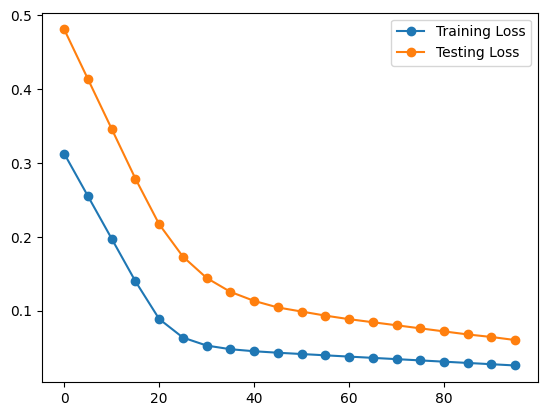

In [15]:
plt.plot(epoch_count, trained, label='Training Loss', marker='o')
plt.plot(epoch_count, tested, label='Testing Loss', marker='o')
plt.legend(loc='best');

# Saving a model in PyTorch

### There are three main methods to know about saving and loading models in PyTorch.
1.`torch.save()` - Saves PyTorch object in pickle format

2.`torch.load()` - Loads a saved PyTorch object

3.`torch.nn.Module.load_state_dict()` - Loads a model's saved state dictionary. 

For HuggingFace Transformers -
1. Saving a model - `model.save_pretrained("path/to/model")`

2. Loading a model - `AutoModelForSequenceClassification.from_pretrained("path/to/model")`
                     (Here it was used, so....)

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [17]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'fused': None,
   'params': [0, 1]}]}

In [18]:
import os
os.getcwd()

'/kaggle/working'

In [19]:
from pathlib import Path

MODEL_PATH = Path('Models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '01_PyTorch_Workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('Models/01_PyTorch_Workflow_model_0.pth')

In [20]:
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)
print(f'Saved the model to {MODEL_SAVE_PATH}')

Saved the model to Models/01_PyTorch_Workflow_model_0.pth


In [21]:
!ls -l Models

total 4
-rw-r--r-- 1 root root 1680 Jan  5 09:31 01_PyTorch_Workflow_model_0.pth


# Loading a PyTorch model (one saved from state_dict())

In [22]:
torch.manual_seed(42)

loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-22-17843d0fe2de>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [23]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [24]:
loaded_model_0.eval()
with torch.inference_mode():
    preds = loaded_model_0(X_test)

preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [25]:
preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# ******** Putting it all together ********

# Approach using nn.Linear

In [26]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Instead of weights and biases, we use Linear Layer
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [27]:
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [28]:
X_train, y_train, X_test, y_test

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [29]:
# Setting up device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [30]:
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [31]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [32]:
loss_fn = nn.L1Loss()

optimizer = optim.SGD(model_1.parameters(), lr=0.01)

epochs = 100

In [33]:
print(list(model_1.parameters()))

[Parameter containing:
tensor([[0.7645]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.8300], device='cuda:0', requires_grad=True)]


In [34]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

In [35]:
optimizer.param_groups

[{'params': [Parameter containing:
   tensor([[0.7645]], device='cuda:0', requires_grad=True),
   Parameter containing:
   tensor([0.8300], device='cuda:0', requires_grad=True)],
  'lr': 0.01,
  'momentum': 0,
  'dampening': 0,
  'weight_decay': 0,
  'nesterov': False,
  'maximize': False,
  'foreach': None,
  'differentiable': False,
  'fused': None}]

In [36]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'fused': None,
   'params': [0, 1]}]}

In [37]:
epoch_count = []
train_loss = []
test_loss = []

for epoch in range(epochs):
    model_1.train()
    X_train = X_train.to(device)
    X_test = X_test.to(device)
    y_train = y_train.to(device)
    y_test = y_test.to(device)
    

    y_preds = model_1(X_train)
    loss = loss_fn(y_train, y_preds)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    epoch_count.append(epoch)
    train_loss.append(loss.detach().item())

    
    model_1.eval()
    with torch.inference_mode():
        y_preds = model_1(X_test)
        loss = loss_fn(y_test, y_preds)
        test_loss.append(loss.detach().item())
        if epoch%5==0:
            print(f"Epoch : {epoch+1} | Loss : {loss}")

Epoch : 1 | Loss : 0.5739762187004089
Epoch : 6 | Loss : 0.5066213011741638
Epoch : 11 | Loss : 0.4392664134502411
Epoch : 16 | Loss : 0.37191149592399597
Epoch : 21 | Loss : 0.30455657839775085
Epoch : 26 | Loss : 0.23720164597034454
Epoch : 31 | Loss : 0.16984669864177704
Epoch : 36 | Loss : 0.1024918332695961
Epoch : 41 | Loss : 0.03513690456748009
Epoch : 46 | Loss : 0.029703443869948387
Epoch : 51 | Loss : 0.04784907028079033
Epoch : 56 | Loss : 0.048565614968538284
Epoch : 61 | Loss : 0.045803118497133255
Epoch : 66 | Loss : 0.04166685417294502
Epoch : 71 | Loss : 0.037530567497015
Epoch : 76 | Loss : 0.034081198275089264
Epoch : 81 | Loss : 0.02994490973651409
Epoch : 86 | Loss : 0.025808637961745262
Epoch : 91 | Loss : 0.02167237363755703
Epoch : 96 | Loss : 0.017536098137497902


In [38]:
torch.tensor(3).detach().item()

3

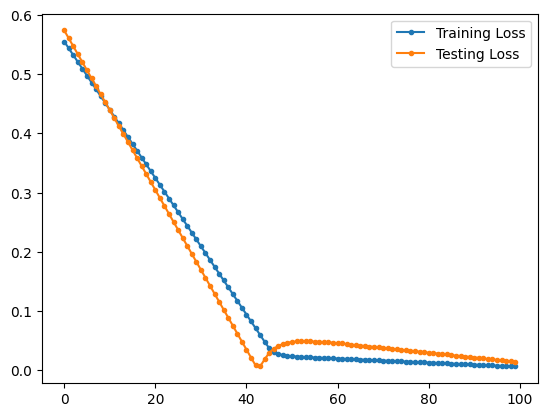

In [39]:
plt.plot(epoch_count, train_loss, label='Training Loss', marker='.')
plt.plot(epoch_count, test_loss, label='Testing Loss', marker='.')
plt.legend(loc='best');

In [40]:
epoch_count[:5], train_loss[:5], test_loss[:5]

([0, 1, 2, 3, 4],
 [0.5551779866218567,
  0.5436570048332214,
  0.5321359634399414,
  0.5206149816513062,
  0.5090939998626709],
 [0.5739762187004089,
  0.560505211353302,
  0.5470342636108398,
  0.5335632562637329,
  0.5200923085212708])

In [41]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6691]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3130], device='cuda:0'))])

In [42]:
list(model_1.parameters())

[Parameter containing:
 tensor([[0.6691]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.3130], device='cuda:0', requires_grad=True)]

In [43]:
# Making predictions

model_1.eval()
with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds, y_test

(tensor([[0.8483],
         [0.8617],
         [0.8750],
         [0.8884],
         [0.9018],
         [0.9152],
         [0.9286],
         [0.9420],
         [0.9553],
         [0.9687]], device='cuda:0'),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]], device='cuda:0'))

In [44]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '01_PyTorch_NN_Implementation.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

print(f'Model saved successfully to {MODEL_SAVE_PATH}')

Model saved successfully to models/01_PyTorch_NN_Implementation.pth


In [45]:
# Loading the same saved model
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

<ipython-input-45-f29338b4a2f8>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [46]:
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [47]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6691]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3130], device='cuda:0'))])

In [48]:
loaded_model_1.eval()
with torch.inference_mode():
    y_pred = loaded_model_1(X_test)

y_pred == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')